In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
from vahun.tools import Timer
from vahun.corpus import Corpus
from vahun.tools import explog
from vahun.variational_autoencoder import Variational_autoencoder
from vahun.tools import show_performance

encode=180
dictsize=2000000
popsize=1


config = tf.ConfigProto()
config.gpu_options.allow_growth = True
#config.gpu_options.per_process_gpu_memory_fraction=1
corp_path='/mnt/permanent/Language/Hungarian/Corp/Webkorpusz/webkorpusz.wpl'
corp=Corpus(corpus_path=corp_path,
            needed_corpus=["hun_lower_unique"],
            language="Hun",size=dictsize,encoding_len=10)
database=corp.mark_list(corp.hun_lower_unique)
all_features=corp.featurize_data_charlevel_onehot(database)
train=all_features[0:int(len(all_features)*0.8)]
test=all_features[int(len(all_features)*0.8):len(all_features)]
x_train = train.reshape((len(train), np.prod(train.shape[1:])))
x_test = test.reshape((len(test), np.prod(test.shape[1:])))
print(x_train.shape)

logger=explog(encoder_type="variational_unique_"+str(encode),
              encoding_dim=encode,feature_len=10,
              lang="Hun",unique_words=len(set(database)),
              name="variational_unique_"+str(encode),population_size=popsize,
              words=len(corp.hun_lower_unique))

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

Reading file, speed:  2254264.060853194  words/s
Reading file, speed:  2175554.638045898  words/s
Corpus initalized, fields: ['hun_lower_unique'] 
Unique words:  214708
(46627, 380)


In [2]:
encoder=Variational_autoencoder(logger=logger,tf_session=sess,
                         inputdim=380,
                         encoding_size=180,
                         optimizer =tf.train.AdamOptimizer(learning_rate = 0.001),
                         nonlinear=tf.sigmoid)
encoder.train(x_train,x_test,512,80)

   ^kupák$ 	    ^kupák$
   ^harag$ 	    ^harag$
 ^kupában$ 	  ^kupában$
 ^komárom$ 	  ^komárom$
^mezőknek$ 	 ^mezőknek$
   ^ivarú$ 	    ^ivara$
    ^állt$ 	     ^állt$
 ^szétdől$ 	  ^szétdől$
     ^önt$ 	      ^ünt$
 ^véghseő$ 	  ^véghseő$
  ^hibáin$ 	   ^hibáin$
 ^mozgású$ 	  ^mozgásr$
^emigrált$ 	 ^emigrált$
  ^pénzük$ 	   ^pénzük$
 ^ábránál$ 	  ^ábránál$
     ^éld$ 	      ^éld$
  ^rátára$ 	   ^rátára$
^atlantai$ 	 ^atlantai$
^ajtókkal$ 	 ^adtókkal$
  ^aceton$ 	   ^aceton$
^iparosok$ 	 ^iparosok$
    ^váró$ 	     ^váró$
  ^mérget$ 	   ^mérget$
    ^nált$ 	     ^nált$
    ^sand$ 	     ^sand$
^csúsztat$ 	 ^csgsztat$
 ^hántára$ 	  ^hántára$
 ^kötetei$ 	  ^kötetei$
^fölhívni$ 	 ^fölhívni$
 ^párolja$ 	  ^párolja$
 ^hideget$ 	  ^hideget$
^koszigin$ 	 ^koszigin$
^fiúsarja$ 	 ^fifsarja$
^kárunkra$ 	 ^kárunkra$
   ^gazsó$ 	    ^gazsó$
 ^szaknak$ 	  ^szaknak$
 ^magamra$ 	  ^magamra$
   ^órára$ 	    ^órára$
^díszítem$ 	 ^ivszítem$
  ^auchan$ 	   ^auchan$
  ^nőttek$ 	   ^nőttek$
^rossinál$ 	 ^ro

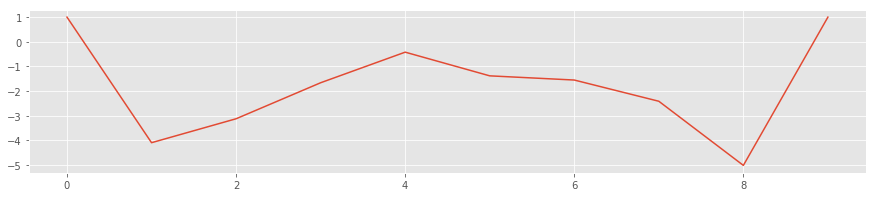

In [3]:
stds=show_performance(encoder,x_test,corp,100,printer=True)

         e 	       ^ak$
        eh 	       ^be$
     kutya 	      kuty$
     aytuk 	      aytk$
    macska 	     macsk$
 árvíztűrő 	  ^rvíztlr$
      fúró 	       ^er$
   ^kacsa$ 	    ^kacsa$
         a 	       ^ns$
        és 	       ^té$

Accuracy on data:  76.0 %


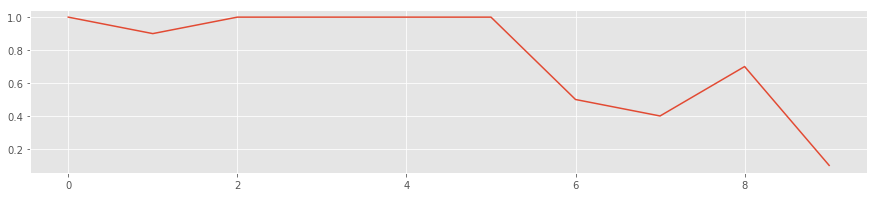

In [7]:
stds=show_performance(encoder,["e","eh","kutya","aytuk","macska","árvíztűrő","fúró","^kacsa$","a","és"],corp,printer=True)

In [5]:
def decode_critical(enc=180):
    for POS in range(enc):
        encoded=np.ones(enc)
        encoded[POS]=0
        a=encoder.decode([encoded])[0].reshape([10,36])

        b=corp.defeaturize_data_charlevel_onehot([a])
        print(b)

In [6]:
a="valami kacsa pizs dzsip"
for items in ["cs","zs"]:
    print(a.replace(items,"xxx"))
print(a)

valami kaxxxa pizs dzsip
valami kacsa pixxx dxxxip
valami kacsa pizs dzsip
